# Problem Scoping


## Who
Program ini ditujukan untuk para petani buah strawberry dan masyarakat yang ingin membeli buah strawberry di perkebunan langsung.
## What
*   Tanaman stroberi sering terkena penyakit daun hangus
*   Penyakit daun hangus dapat menyebabkan tanaman menjadi lemah, bahkan kematian
*   Penyakit daun hangus berpengaruh terhadap hasil panen stroberi sehingga dapat menurunkan nilai jualnya

## Where
Di lahan perkebunan strawberry.
## Why
Program ini dibuat untuk mendeteksi tanaman strawberry bagus atau tidak kualitasnya dilihat dari daunnya dan diharapkan petani dapat melakukan tindakan pencegahan dan pengendalian lebih awal.
## Ideal Solutions
Panen tepat waktu dan suplai terhadap permintaan pasar tepat waktu.

# Data Acquisition

Connect google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Library yang dibutuhkan

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import keras 
import glob 
from skimage import io 
import random 

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

import os
from os.path import exists

import cv2

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing import image
from keras.models import load_model
%matplotlib inline


## Import Citra Daun Strawberry
Citra daun strawberry disini terdapat 2 macam yaitu daun strawberry yang sehat dan daun strawberry yang hangus
Unzip dataset dan letakan di dalam folder content

In [ ]:
!unzip /content/drive/MyDrive/Dataset-Strawberry.zip -d /content

Archive:  /content/drive/MyDrive/Dataset-Strawberry.zip
   creating: /content/Dataset-Strawberry/test/
   creating: /content/Dataset-Strawberry/test/Strawberry___healthy/
  inflating: /content/Dataset-Strawberry/test/Strawberry___healthy/00e9a277-ca5e-4350-95ce-8b2918b69fb9___RS_HL 4667.JPG  
  inflating: /content/Dataset-Strawberry/test/Strawberry___healthy/01e591c9-e3e7-4edc-8211-13081f4d5e7a___RS_HL 1979.JPG  
  inflating: /content/Dataset-Strawberry/test/Strawberry___healthy/02caa98d-1c74-43b3-b3ee-e8492998f82a___RS_HL 2090.JPG  
  inflating: /content/Dataset-Strawberry/test/Strawberry___healthy/02ecedef-e743-4909-a000-bff6ff373b6c___RS_HL 2222.JPG  
  inflating: /content/Dataset-Strawberry/test/Strawberry___healthy/03fe6806-ca61-46c1-8889-45e40228c168___RS_HL 4632.JPG  
  inflating: /content/Dataset-Strawberry/test/Strawberry___healthy/04cb725a-632d-44e0-9886-c84e2bbdd3da___RS_HL 2094.JPG  
  inflating: /content/Dataset-Strawberry/test/Strawberry___healthy/06d4ec77-12ef-47ed-ab37-

Cek jumlah file yang terdapat dalam dataset

In [ ]:
print('Test set daun sehat' , len(os.listdir('/content/Dataset-Strawberry/test/Strawberry___healthy')))
print('Test set daun hangus' , len(os.listdir('/content/Dataset-Strawberry/test/Strawberry___Leaf_scorch')))
print('Train set daun sehat' , len(os.listdir('/content/Dataset-Strawberry/train/Strawberry___healthy')))
print('Train set daun hangus' , len(os.listdir('/content/Dataset-Strawberry/train/Strawberry___Leaf_scorch')))

Test set daun sehat 91
Test set daun hangus 221
Train set daun sehat 330
Train set daun hangus 335


## Data Preprocessing

In [ ]:
# Import dan load ke dataframe (test)

dataset_path = '/content/Dataset-Strawberry/test'
class_names = ['Strawberry___Leaf_scorch', 'Strawberry___healthy']

# menerapkan modul glob untuk mengambil nama filepath  

strawberry_path = os.path.join(dataset_path, class_names[1], '*')
strawberry_path = glob.glob(strawberry_path)

# mengakses file gambar dari class yang ada di dataset
strawberry_img = io.imread(strawberry_path[0])

In [ ]:
# convert to numpy array
data_test = img_to_array(strawberry_img)

# expand dimension to one sample
samples_strawberry = expand_dims(strawberry_img, 0)

samples_strawberry

array([[[[194, 188, 192],
         [203, 197, 201],
         [207, 201, 205],
         ...,
         [189, 183, 187],
         [198, 192, 196],
         [197, 191, 195]],

        [[185, 179, 183],
         [190, 184, 188],
         [194, 188, 192],
         ...,
         [190, 184, 188],
         [191, 185, 189],
         [191, 185, 189]],

        [[189, 183, 187],
         [188, 182, 186],
         [186, 180, 184],
         ...,
         [195, 189, 193],
         [187, 181, 185],
         [188, 182, 186]],

        ...,

        [[159, 148, 156],
         [140, 129, 137],
         [137, 126, 134],
         ...,
         [160, 149, 157],
         [160, 149, 157],
         [125, 114, 122]],

        [[135, 124, 132],
         [143, 132, 140],
         [133, 122, 130],
         ...,
         [163, 152, 160],
         [145, 134, 142],
         [128, 117, 125]],

        [[118, 107, 115],
         [139, 128, 136],
         [145, 134, 142],
         ...,
         [122, 111, 119],
        

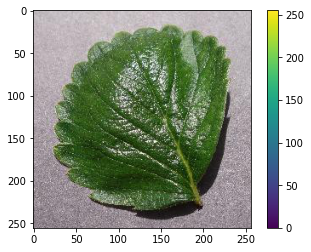

In [ ]:
plt.figure()
plt.imshow(samples_strawberry[0])
plt.colorbar()
plt.grid(False)
plt.show()

Number of images of Strawberry___healthy: 330 || Number of images of Strawberry___Leaf_scorch: 335 || Total number of images we have 665


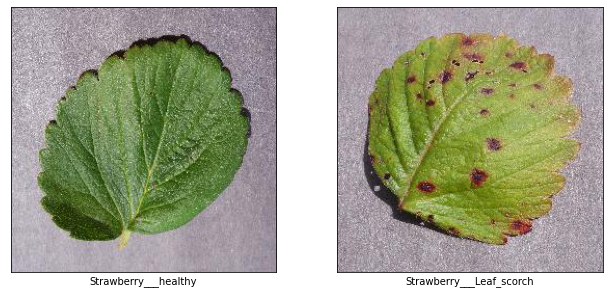

In [ ]:
path='/content/Dataset-Strawberry/train'
plt.figure(figsize=(40,40))
count=0
plant_names=[]
total_images=0
for i in os.listdir(path):
  count+=1
  plant_names.append(i)
  plt.subplot(7,7,count)

  images_path=os.listdir(path+"/"+i)
  print("Number of images of "+i+":",len(images_path),"||",end=" ")
  total_images+=len(images_path)

  image_show=plt.imread(path+"/"+i+"/"+images_path[0])
  
  plt.imshow(image_show)
  plt.xlabel(i)
  
  plt.xticks([])
  plt.yticks([])


print("Total number of images we have",total_images)

In [ ]:
# Membuat directory file
data_dir = '/content/Dataset-Strawberry'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

In [ ]:

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + "files"

In [ ]:
#Menentukan image shape dan batch size
IMAGE_SHAPE = (224, 224)

BATCH_SIZE = 64

In [ ]:
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    test_dir, 
    shuffle=False, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
  rescale = 1./255,
  rotation_range=40,
  horizontal_flip=True,
  width_shift_range=0.2, 
  height_shift_range=0.2,
  shear_range=0.2, 
  zoom_range=0.2,
  fill_mode='nearest' )
  
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    subset="training", 
    shuffle=True, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE)

Found 312 images belonging to 2 classes.
Found 665 images belonging to 2 classes.


In [ ]:
classes = {j: i for i, j in train_generator.class_indices.items()}
classes

{0: 'Strawberry___Leaf_scorch', 1: 'Strawberry___healthy'}

Dataset yang digunakan memiliki 2 kelas yaitu Strawberry___Leaf_scorch yang menunjukkan daun stawberry yang terkena penyakit hangus dan Strawberry___healthy yang merupakan strawberry yang sehat.

# Modelling

Pembuatan model ini menggunakan MobileNetV2 yang merupakan model CNN yang dikembangkan oleh Google. MobileNetV2 menggunakan depthwise convolution, pointwise convolution, linear bottleneck dan shortcut connections antar bottlenecks (Sandler et al., 2018)

In [ ]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

Compile menggunakan Adam dengan learning rate sebesar 0.001

In [ ]:
LEARNING_RATE = 0.001

model.compile(
   optimizer=tf.keras.optimizers.Adam(LEARNING_RATE), 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [ ]:
EPOCHS=10

history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/10
10/10 [==============================] - 12s 874ms/step - loss: 0.1952 - accuracy: 0.9118 - val_loss: 0.0351 - val_accuracy: 0.9883
Epoch 2/10
10/10 [==============================] - 8s 791ms/step - loss: 0.0086 - accuracy: 0.9983 - val_loss: 0.0383 - val_accuracy: 0.9883
Epoch 3/10
10/10 [==============================] - 8s 783ms/step - loss: 0.0255 - accuracy: 0.9900 - val_loss: 0.0196 - val_accuracy: 0.9961
Epoch 4/10
10/10 [==============================] - 8s 786ms/step - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.0325 - val_accuracy: 0.9883
Epoch 5/10
10/10 [==============================] - 8s 840ms/step - loss: 0.0121 - accuracy: 0.9933 - val_loss: 0.0205 - val_accuracy: 0.9961
Epoch 6/10
10/10 [==============================] - 8s 789ms/step - loss: 0.0238 - accuracy: 0.9950 - val_loss: 0.0185 - val_accuracy: 0.9961
Epoch 7/10
10/10 [==============================] - 8s 789ms/step - loss: 0.0037 - accuracy: 0.9983 - val_loss: 0.0208 - val_accuracy: 0.9961
Epoch

Grafik akurasi dari training dan validation

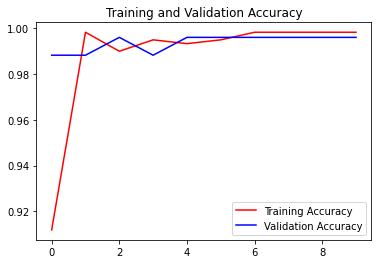

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Grafik loss dari training dan validation

<Figure size 432x288 with 0 Axes>

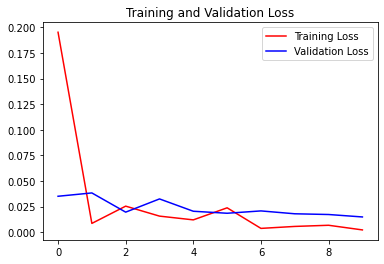

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()

# Evaluasi Model

In [ ]:
model.evaluate(validation_generator, batch_size=64)

5/5 [==============================] - 1s 140ms/step - loss: 0.0127 - accuracy: 0.9968


[0.01267997920513153, 0.9967948794364929]

Berdasarkan hasil evaluasi di atas, terlihat bahwa model yang dibuat memiliki akurasi sebesar 99% dengan loss sebesar 0.01

# Save Model

In [ ]:
model.save('model_3.h5')

Model yang telah dibuat kemudian disimpan dengan nama model_3 

# Prediction

In [ ]:
def load_image(filename):
    img = cv2.imread(os.path.join(test_dir, filename))
    img = cv2.resize(img, (IMAGE_SHAPE[0], IMAGE_SHAPE[1]) )
    img = img /255
    
    return img


def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)
    
    return {classes[class_idx]: probabilities[class_idx]}

Strawberry___healthy


PREDICTED: Strawberry___healthy, confidence: 0.999952


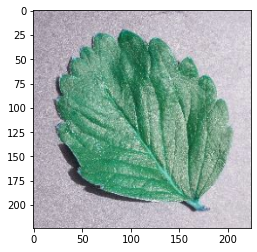

<Figure size 432x288 with 0 Axes>

Strawberry___Leaf_scorch
PREDICTED: Strawberry___Leaf_scorch, confidence: 0.999999


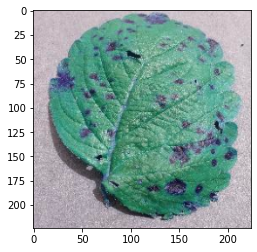

In [ ]:
for idx, filename in enumerate(random.sample(validation_generator.filenames, 2)):
    print(os.path.split(filename)[0])
    
    img = load_image(filename)
    prediction = predict(img)
    print("PREDICTED: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.figure(idx)    
    plt.show()

/content/Dataset-Strawberry/test/Strawberry___Leaf_scorch/02cd135e-0ef2-45ec-b77d-a329b68cbea7___RS_L.Scorch 0080.JPG
Daun strawberry sakit


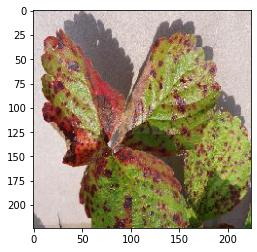

In [ ]:
model = load_model(('/content/model_3.h5'),custom_objects={'KerasLayer':hub.KerasLayer})
# change it to your filename
test_image = '/content/Dataset-Strawberry/test/Strawberry___Leaf_scorch/02cd135e-0ef2-45ec-b77d-a329b68cbea7___RS_L.Scorch 0080.JPG'
 
# predicting images
path = test_image
img = image.load_img(path, target_size=(224,224))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) 
images = np.vstack([x])
result = model.predict(images)


print(test_image)
if result[0][0] == 1:
  print('Daun strawberry sehat')
else:
  print('Daun strawberry sakit')
  

Berdasarkan hasil prediksi, model yang dibuat dapat memprediksi gambar yang dimasukkan secara benar.